# To analyze the sentiments of people over the Ukraine and Russian War

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import re
from nltk.corpus import stopwords
import string

In [17]:
data = pd.read_csv("DATASET\\Ukraine_russia.csv")
print(data.head())

                    id      conversation_id               created_at  \
0  1603556956152762368  1603506232463167488  2022-12-16 01:05:45 UTC   
1  1603556953497960449  1603455603606798378  2022-12-16 01:05:45 UTC   
2  1603556940529160192  1603556940529160192  2022-12-16 01:05:41 UTC   
3  1603556918295171072  1603556918295171072  2022-12-16 01:05:36 UTC   
4  1603556903501586438  1603556903501586438  2022-12-16 01:05:33 UTC   

         date      time  timezone              user_id         username  \
0  2022-12-16  01:05:45         0  1497772151629398020  slav17396778800   
1  2022-12-16  01:05:45         0  1555026223742554112    chupacuca3000   
2  2022-12-16  01:05:41         0  1468335170315251712  firstsgtfrances   
3  2022-12-16  01:05:36         0            316306493        revmcairy   
4  2022-12-16  01:05:33         0  1525136507580948486     sgnewsalerts   

                      name place  ... geo source user_rt_id user_rt  \
0         Slav#17396778800   NaN  ... NaN    

In [18]:
print(data.columns)

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


In [19]:
data=data[['username','tweet','language']]

In [20]:
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [21]:
data['language'].value_counts()

en     8781
pt      371
it      221
qme     170
und      96
in       89
ru       37
es       36
ja       31
qht      31
ca       20
fi       15
fr       13
th       12
de       11
nl       11
tl        9
ro        9
pl        8
hi        6
uk        6
vi        6
no        5
tr        4
cs        4
ar        4
et        3
sv        2
da        2
qam       1
ko        1
ht        1
hu        1
zh        1
lv        1
Name: language, dtype: int64

In [25]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
%pip install wordcloud

In [36]:
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator

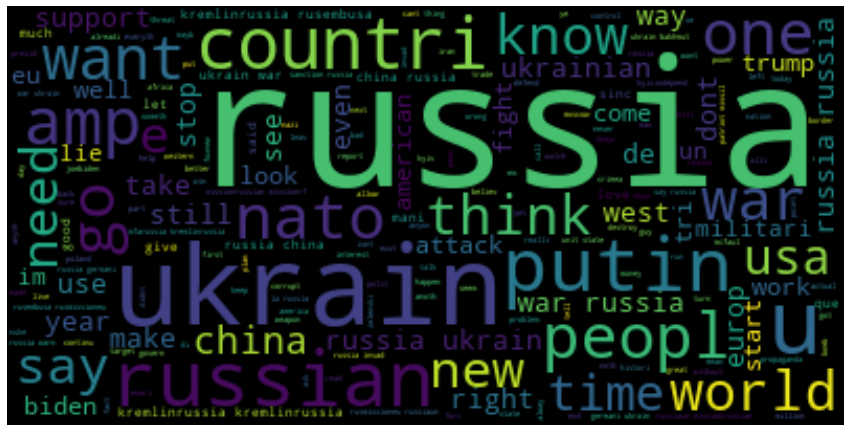

In [38]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [39]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...


                                               tweet  Positive  Negative  \
0  liberalmonarch apokekrummenain get offic doesn...       0.0     0.415   
1  khughesofmain scottpresl joebiden person would...       0.0     0.251   
2  russia catastroph oil amp gas problem   via yo...       0.0     0.278   
3  nft thing realli make look trump differ countr...       0.0     0.213   
4  kill civilian russian arm forc un high commiss...       0.0     0.217   

   Neutral  
0    0.585  
1    0.749  
2    0.722  
3    0.787  
4    0.783  


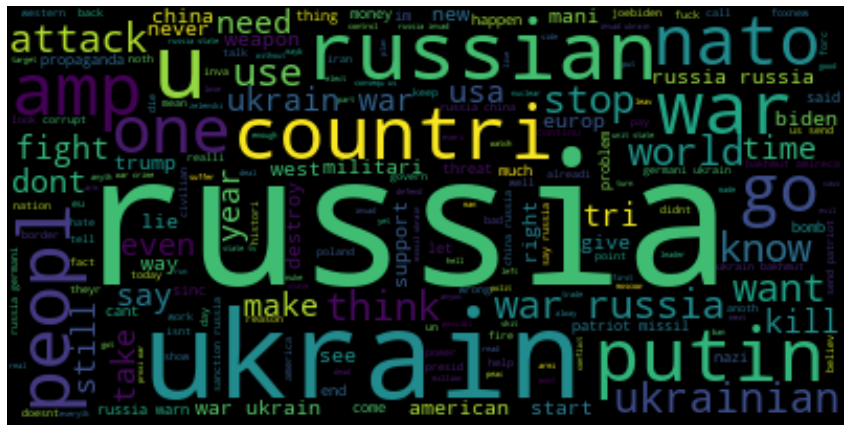

In [43]:
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

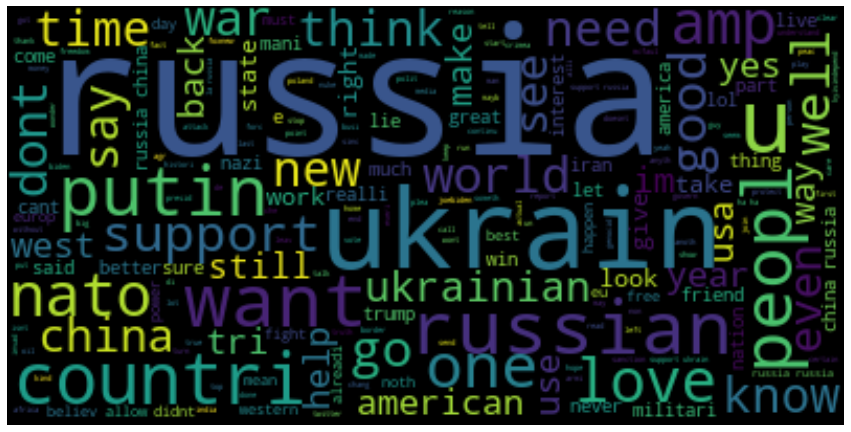

In [47]:
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()